This notebook is to test finite elements in 1D. Here we can directly initialize a 1D solution.


In [2]:
import tensorflow as tf
import tensorflow.keras.layers as layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [1]:
import matplotlib.pyplot as plt
def alpha(x,al = 0.5):
    return x**0.5

def interpolate_func(func, pos,x_domain, global_len=50):
    #h = 1/(global_len)
    result=[]
    h = x_domain
    #print(h)
    if pos==1:
        result.append(func[1]/h[0])
        return [func[1]/h[0]]
    else:
        result = interpolate_func(func, pos-1,x_domain ,global_len=global_len)
        c_sum = np.sum(result)
        loc_ret = (func[pos]-func[pos-1])/h[pos-1] - c_sum
        #print(loc_ret)
        result.append(loc_ret)
    return result



def relu_apply(x, arr):
    def relu(y):
        return np.max(0,y)
    return np.sum(relu(x-arr))

N=10
domain_exp = np.array([0.67**i for i in range(0,N)])[::-1]
x_vec = np.insert(domain_exp,0,0)
domain = np.linspace(0,1,300)
func_vals = alpha(x_vec)
loc = interpolate_func(func_vals,N,x_domain=np.diff(x_vec),global_len=N)


NameError: ignored

In [ ]:
domain_exp = np.array([1/(2**i) for i in range(0,N)])[::-1]

domain_exp = np.insert(domain_exp,0,0)

[0.00195312 0.00195312 0.00390625 0.0078125  0.015625   0.03125
 0.0625     0.125      0.25       0.5       ]


In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # suppress Tensorflow messages


In [ ]:
encoder_input = tf.keras.Input(shape=(1))
#x = layers.subtract([encoder_input,x_vec.T])
x = layers.Dense(10, activation="relu")(encoder_input)
#x = layers.Dense(24, activation="relu")(x)
#x = layers.Dense(10)(x)
encoder_output = layers.Dense(1)(x)

model = tf.keras.Model(encoder_input, encoder_output, name="encoder")
#print(model.get_weights())
#model.summary()

In [ ]:
weight_list = [np.ones(10).reshape((1,10)), -x_vec[0:10].reshape((10,)),np.array(loc).reshape((10,1)) ,np.array([0])]
for layer in weight_list:
    try:
       print(layer.shape)
    except:
        print()
model.set_weights(weight_list)



(1, 10)
(10,)
(10, 1)
(1,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


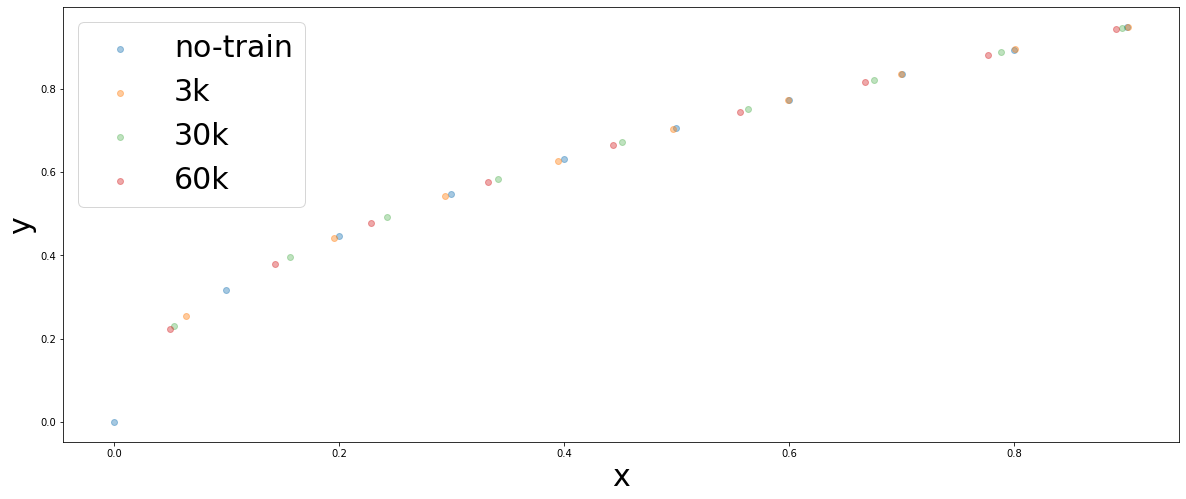

In [ ]:
domain_l = np.linspace(-0.00,1.6,120)
offset = -model.layers[1].get_weights()[1]#[1:]
offset_60k = offset

plt.figure(figsize=(20,8))
plt.scatter(offset_0k,alpha(offset_0k),alpha=0.4,label='no-train')
plt.scatter(offset_3k,alpha(offset_3k),alpha=0.4,label='3k')
plt.scatter(offset_30k,alpha(offset_30k),alpha=0.3,label="30k")
plt.scatter(offset_60k,alpha(offset_60k),alpha=0.4,label='60k')
plt.xlabel('x', fontsize=30)
plt.ylabel('y', fontsize=30)
plt.legend( fontsize=30)
plt.savefig('alpha_grid_trained.png')



[0.03728359 0.0372836  0.03728358 0.03026514 0.01981439 0.01981439
 0.01981437 0.01981437 0.01981437 0.01576087 0.01395714 0.0139572
 0.01395714 0.01395711 0.0139572  0.01395714 0.01204476 0.01110789
 0.01110783 0.01110795 0.01110783 0.01110792 0.01110792 0.01110786
 0.01026314 0.00925213 0.00925213 0.00925201 0.00925207 0.00925201
 0.00925207 0.00925201 0.00925213 0.00925201 0.00832951 0.0079903
 0.0079903  0.0079903  0.00799036 0.00799018 0.00799048 0.00799012
 0.00799024 0.00799036 0.00755018 0.00710005 0.00710011 0.00710028
 0.00709993 0.00710011 0.00710016 0.00710005 0.00710011 0.00710022
 0.00710011 0.00685865 0.0063743  0.00637412 0.0063746  0.00637388
 0.00637424 0.00637436 0.00637424 0.006374   0.00637424 0.00637418
 0.00637442 0.00637436 0.00590247 0.00576615 0.00576609 0.00576627
 0.0057658  0.00576609 0.00576603 0.00576621 0.00576609 0.00576615
 0.00576609 0.00576615 0.00576621 0.00576609 0.00576586 0.00530577
 0.00524944 0.0052495  0.0052495  0.00524956 0.00524956 0.005249

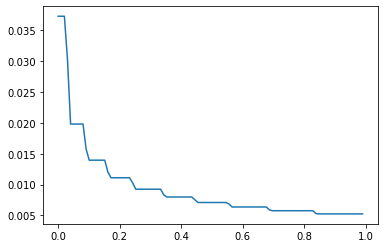

In [ ]:

y_aaa = model(domain).numpy().flatten()
y_aaa = np.diff(y_aaa)#/0.01010101
x_aaa = np.diff(domain)#.reshape(99,0)
print(y_aaa)

plt.plot(domain[:-1], y_aaa )

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss=tf.keras.losses.MAE)

#0.006 -0.0015 at 1.5k 

In [ ]:
history_067 = model.fit(domain,alpha(domain),epochs=60000,verbose=0) #60000

In [ ]:
model_08 = model

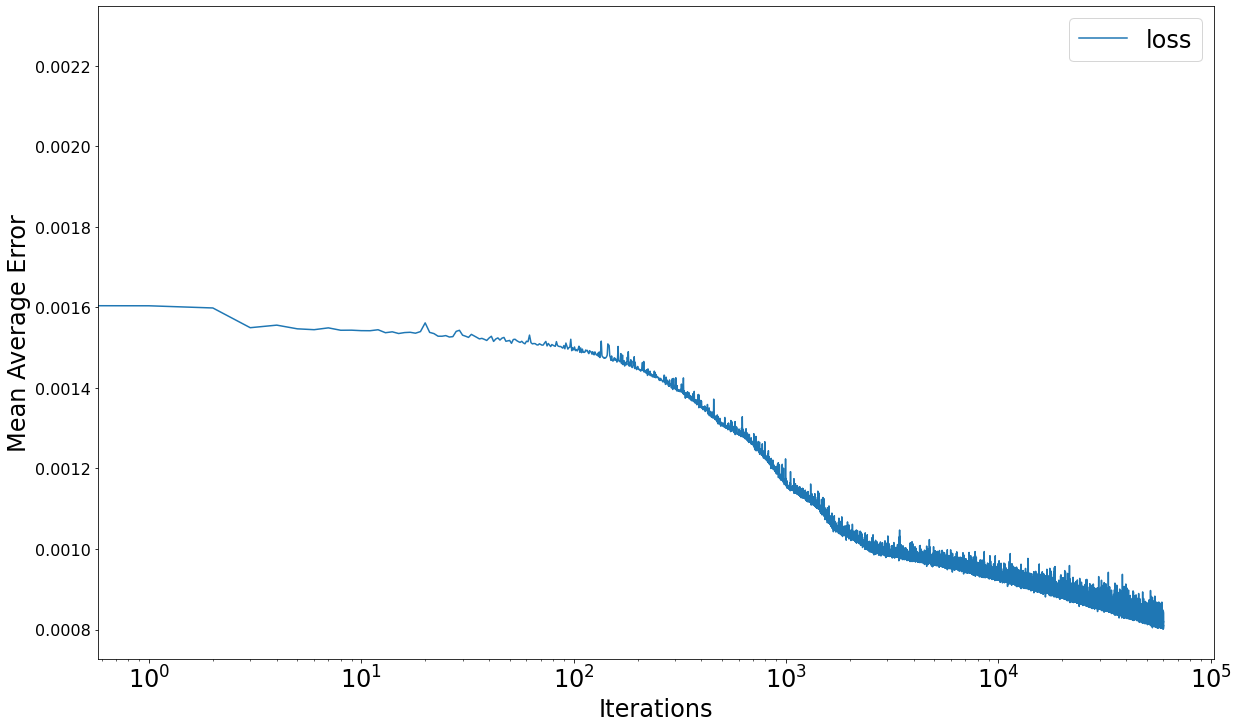

<Figure size 432x288 with 0 Axes>

In [ ]:
ax = pd.DataFrame(history_067.history).plot(figsize=(20,12))
plt.xscale('log')
plt.legend( fontsize=30)
plt.xticks(fontsize=24, rotation=0)
plt.yticks(fontsize=16, rotation=0)
plt.xlabel('Iterations',fontsize=24)
plt.ylabel('Mean Average Error',fontsize=24)
#plt.ylim(0,0.006)
plt.legend(fontsize=24)#['exponential','linear','exp_08']
plt.show()
plt.savefig('training_expo_066_120k.png')

[-0.01539439  0.04383963  0.12218815  0.19296616  0.2814608   0.38613626
  0.50252086  0.6257414   0.7512464   0.8765323 ]


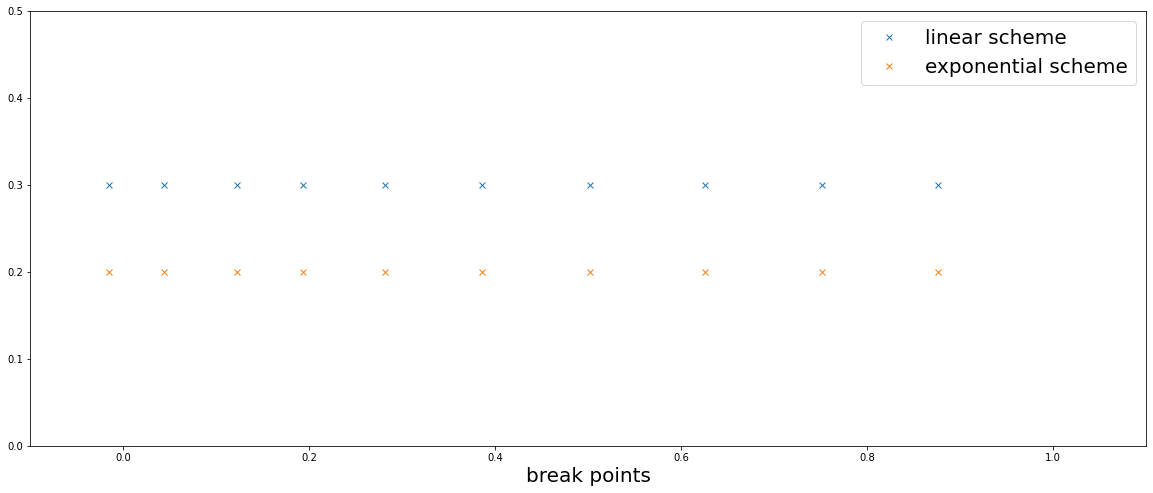

In [ ]:

offset = -model_exp.layers[1].get_weights()[1]#[1:]
offset_exp = offset
print(offset_exp)
#print(offset[1:])
#plt.plot(domain_l,alpha(domain_l))
#plt.scatter(x_vec,alpha(x_vec),alpha=0.3)
#plt.plot(domain_l,model(domain_l))
val=0.1
plt.figure(figsize=(20,8))
plt.plot(offset_reg, np.zeros_like(offset_reg) + 3*val, 'x',label='linear scheme')
plt.plot(offset_reg, np.zeros_like(offset_reg) + 2*val, 'x',label='exponential scheme')

plt.ylim(0,5*val)
plt.xlim(-0.1,1.1)
#plt.xlabel('x', fontsize=30)
plt.xlabel('break points', fontsize=20)
plt.legend( fontsize=20, loc='best')
plt.savefig('alpha_points_trained.png')



In [ ]:
class Linear_t(layers.Layer):
    def __init__(self, units=32,**kwargs):
        super(Linear_t, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(
            shape=( input_shape[-1],self.units),
            initializer="random_normal",
            trainable=False,
        )
        self.b = self.add_weight(
            shape=(self.units,), initializer="random_normal", trainable=True
        )

    def call(self, inputs):
        # print()
        return tf.matmul(inputs,self.w ) + self.b 



model_t = tf.keras.Sequential()
model_t.add(layers.Input(shape=(1,)))
model_t.add(Linear_t(units=10,name='my_linear_layer'))
model_t.add(layers.Activation(tf.nn.relu))
model_t.add(layers.Dense(1))
model_t.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4),
              loss=tf.keras.losses.MAE)
#weight_list=[np.ones(10).reshape((1,10)), -x_vec[0:10].reshape((10,1)),np.array(loc).reshape((10,1)) ,np.array([0])]
weight_list = [np.ones(10).reshape((10,)), -x_vec[0:10].reshape((1,10)),np.array(loc).reshape((10,1)) ,np.array([0])]
model_t.set_weights(weight_list)
model_t.summary()
model.summary()
print(model_t(domain.T))
print(model_t.get_weights())
#print(model.get_weights())

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_linear_layer (Linear_t)   (None, 10)                20        
_________________________________________________________________
activation_25 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 21
Non-trainable params: 10
_________________________________________________________________
Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20        
_______________________________________

In [ ]:
model_t.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4),
              loss=tf.keras.losses.MAE)

In [ ]:
#model_t.fit(domain,alpha(domain),epochs=300000,verbose=0)

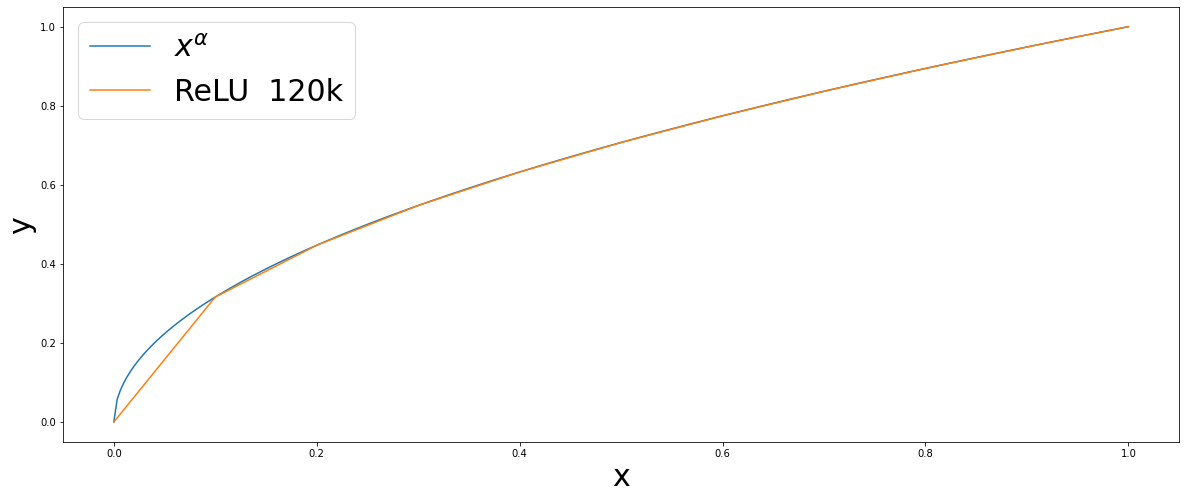

In [ ]:
mod_ex_120k = model(domain)

plt.figure(figsize=(20,8))
plt.plot(domain,alpha(domain),label=r'$x^\alpha$')
#plt.scatter(x_vec,alpha(x_vec),alpha=0.3)
#plt.plot(domain,mod, label="ReLU init")
#plt.plot(domain,mod3k, label="ReLU")
plt.plot(domain,mod_ex_120k, label="ReLU  120k")
#plt.plot(domain,model(domain), label="ReLU Exponential Init")
#plt.plot(domain,mod30), label="ReLU")
plt.xlabel('x', fontsize=30)
plt.ylabel('y', fontsize=30)
plt.legend( fontsize=30)
#plt.savefig('alpha_trained_expo.png')

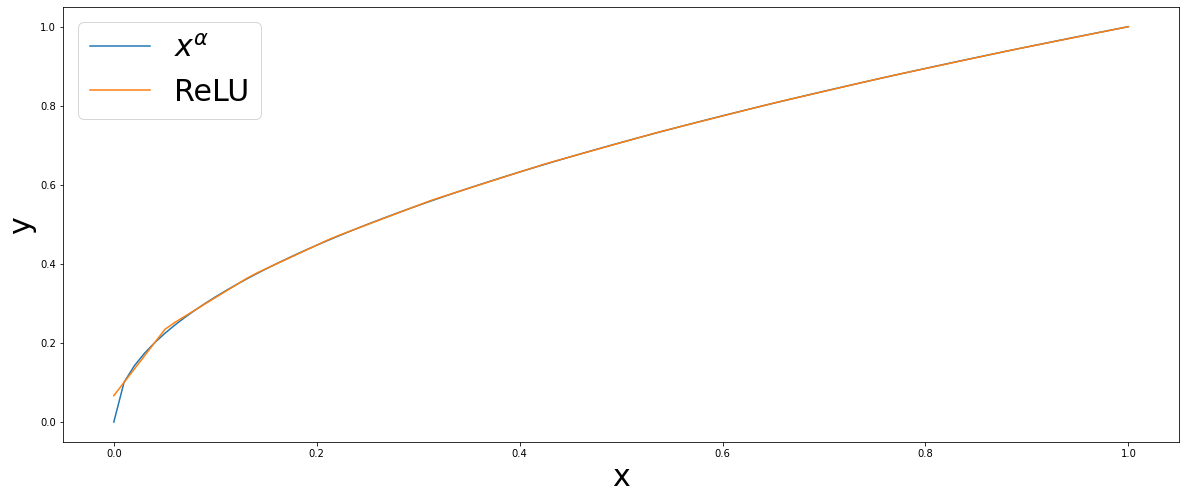

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(domain,alpha(domain),label=r'$x^\alpha$')
#plt.scatter(x_vec,alpha(x_vec),alpha=0.3)
plt.plot(domain,model(domain), label="ReLU")
plt.xlabel('x', fontsize=30)
plt.ylabel('y', fontsize=30)
plt.legend( fontsize=30)
#plt.savefig('alpha_vanilla60.png')

In [ ]:
j_list = []
err_list=[]
domain = np.linspace(0,1,300)
for j in np.linspace(0.5,0.9,1000):
  j_list.append(j)
  domain_exp = np.array([j**i for i in range(0,N)])[::-1]
  x_vec_i = np.insert(domain_exp,0,0)
  func_vals_i = alpha(x_vec_i)
  loc_i = interpolate_func(func_vals_i,N,x_domain=np.diff(x_vec_i),global_len=N)
  weight_list = [np.ones(10).reshape((1,10)), -x_vec_i[0:10].reshape((10,)),np.array(loc_i).reshape((10,1)) ,np.array([0])]
  model_i = tf.keras.Model(encoder_input, encoder_output, name="encoder")
  model_i.set_weights(weight_list)
  model_i.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss=tf.keras.losses.MAE)
  err = model_i.evaluate(domain,alpha(domain),verbose=0)
  err_list.append(err)

0.0028967151883989573


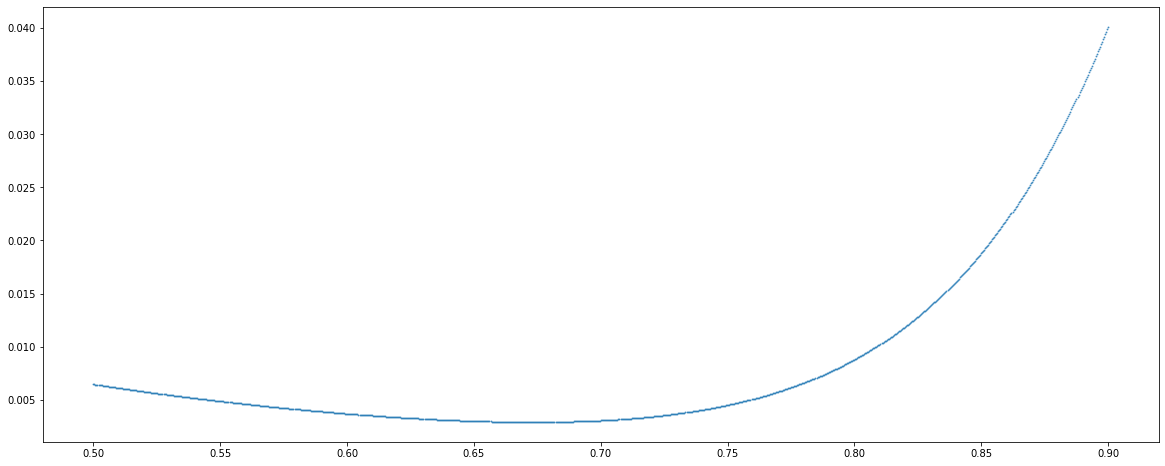

In [ ]:
plt.figure(figsize=(20,8))
plt.scatter(j_list,err_list,alpha=0.7,s=0.9)
print(min(err_list))

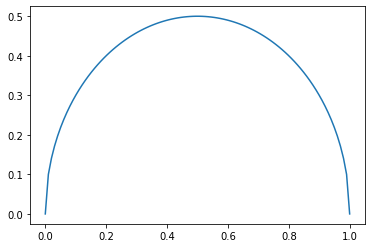

In [ ]:
domain=np.linspace(0,1,100)
plt.plot(domain, (domain*(1-domain))**0.5)